In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
def unit_circle(norm_type, num_points=1000, p_value=None):
    x = np.linspace(-1, 1, num_points)  # Fix x between -1 and 1
    if norm_type == 'L2':
        # L2 Norm: Perfect circle
        theta = np.linspace(0, 2 * np.pi, num_points)
        x = np.cos(theta)
        y = np.sin(theta)
        return x, y
    
    elif norm_type == 'L1':
        # L1 Norm: |x| + |y| = 1
        y_positive = 1 - np.abs(x)
        y_negative = -y_positive
        return np.concatenate([x, x[::-1]]), np.concatenate([y_positive, y_negative])
    
    elif norm_type == 'Linf':
        # L∞ Norm: Square
        x = np.array([1, 1, -1, -1, 1])  # Path around square
        y = np.array([1, -1, -1, 1, 1])
        return x, y
    
    elif norm_type == 'Lp' and p_value:
        # General Lp Norm: |x|^p + |y|^p = 1
        y_positive = (1 - np.abs(x)**p_value)**(1/p_value)
        y_negative = -y_positive
        return np.concatenate([x, x[::-1]]), np.concatenate([y_positive, y_negative])

    else:
        raise ValueError("Invalid norm type. Use 'L1', 'Linf', or 'Lp' with p_value.")

In [3]:
def plot_unit_norms():
    plt.figure(figsize=(8, 8), dpi=300)
    
    # L2 Norm (Euclidean Circle)
    theta = np.linspace(0, 2 * np.pi, 1000)
    x_l2, y_l2 = np.cos(theta), np.sin(theta)
    plt.plot(x_l2, y_l2, label='L2 Norm (Circle)', color='blue')
    
    # L1 Norm (Diamond)
    x, y = unit_circle('L1')
    plt.plot(x, y, color='red', label='L1 Norm (Diamond)', linewidth=2)
    
    # L∞ Norm (Square)
    x_linf, y_linf = unit_circle('Linf')
    plt.plot(x_linf, y_linf, color='green', label='L∞ Norm (Square)', linewidth=2)
    
    # Lp Norm with p=0.5 (Bulging Diamond)
    x, y = unit_circle('Lp', p_value=0.5)
    plt.plot(x, y, color='purple', label='Lp Norm (p=0.5)', linewidth=2)
    
    # Lp Norm with p=4 (Rounded Square)
    x, y = unit_circle('Lp', p_value=4)
    plt.plot(x, y, color='orange', label='Lp Norm (p=4)', linewidth=2)
    
    # Formatting
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')  # Equal scaling
    plt.title("Unit Norm Circles for Different Norms")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.legend(loc='center', fontsize=8)
    plt.grid(True, linestyle='--', alpha=0.2)
    plt.show()

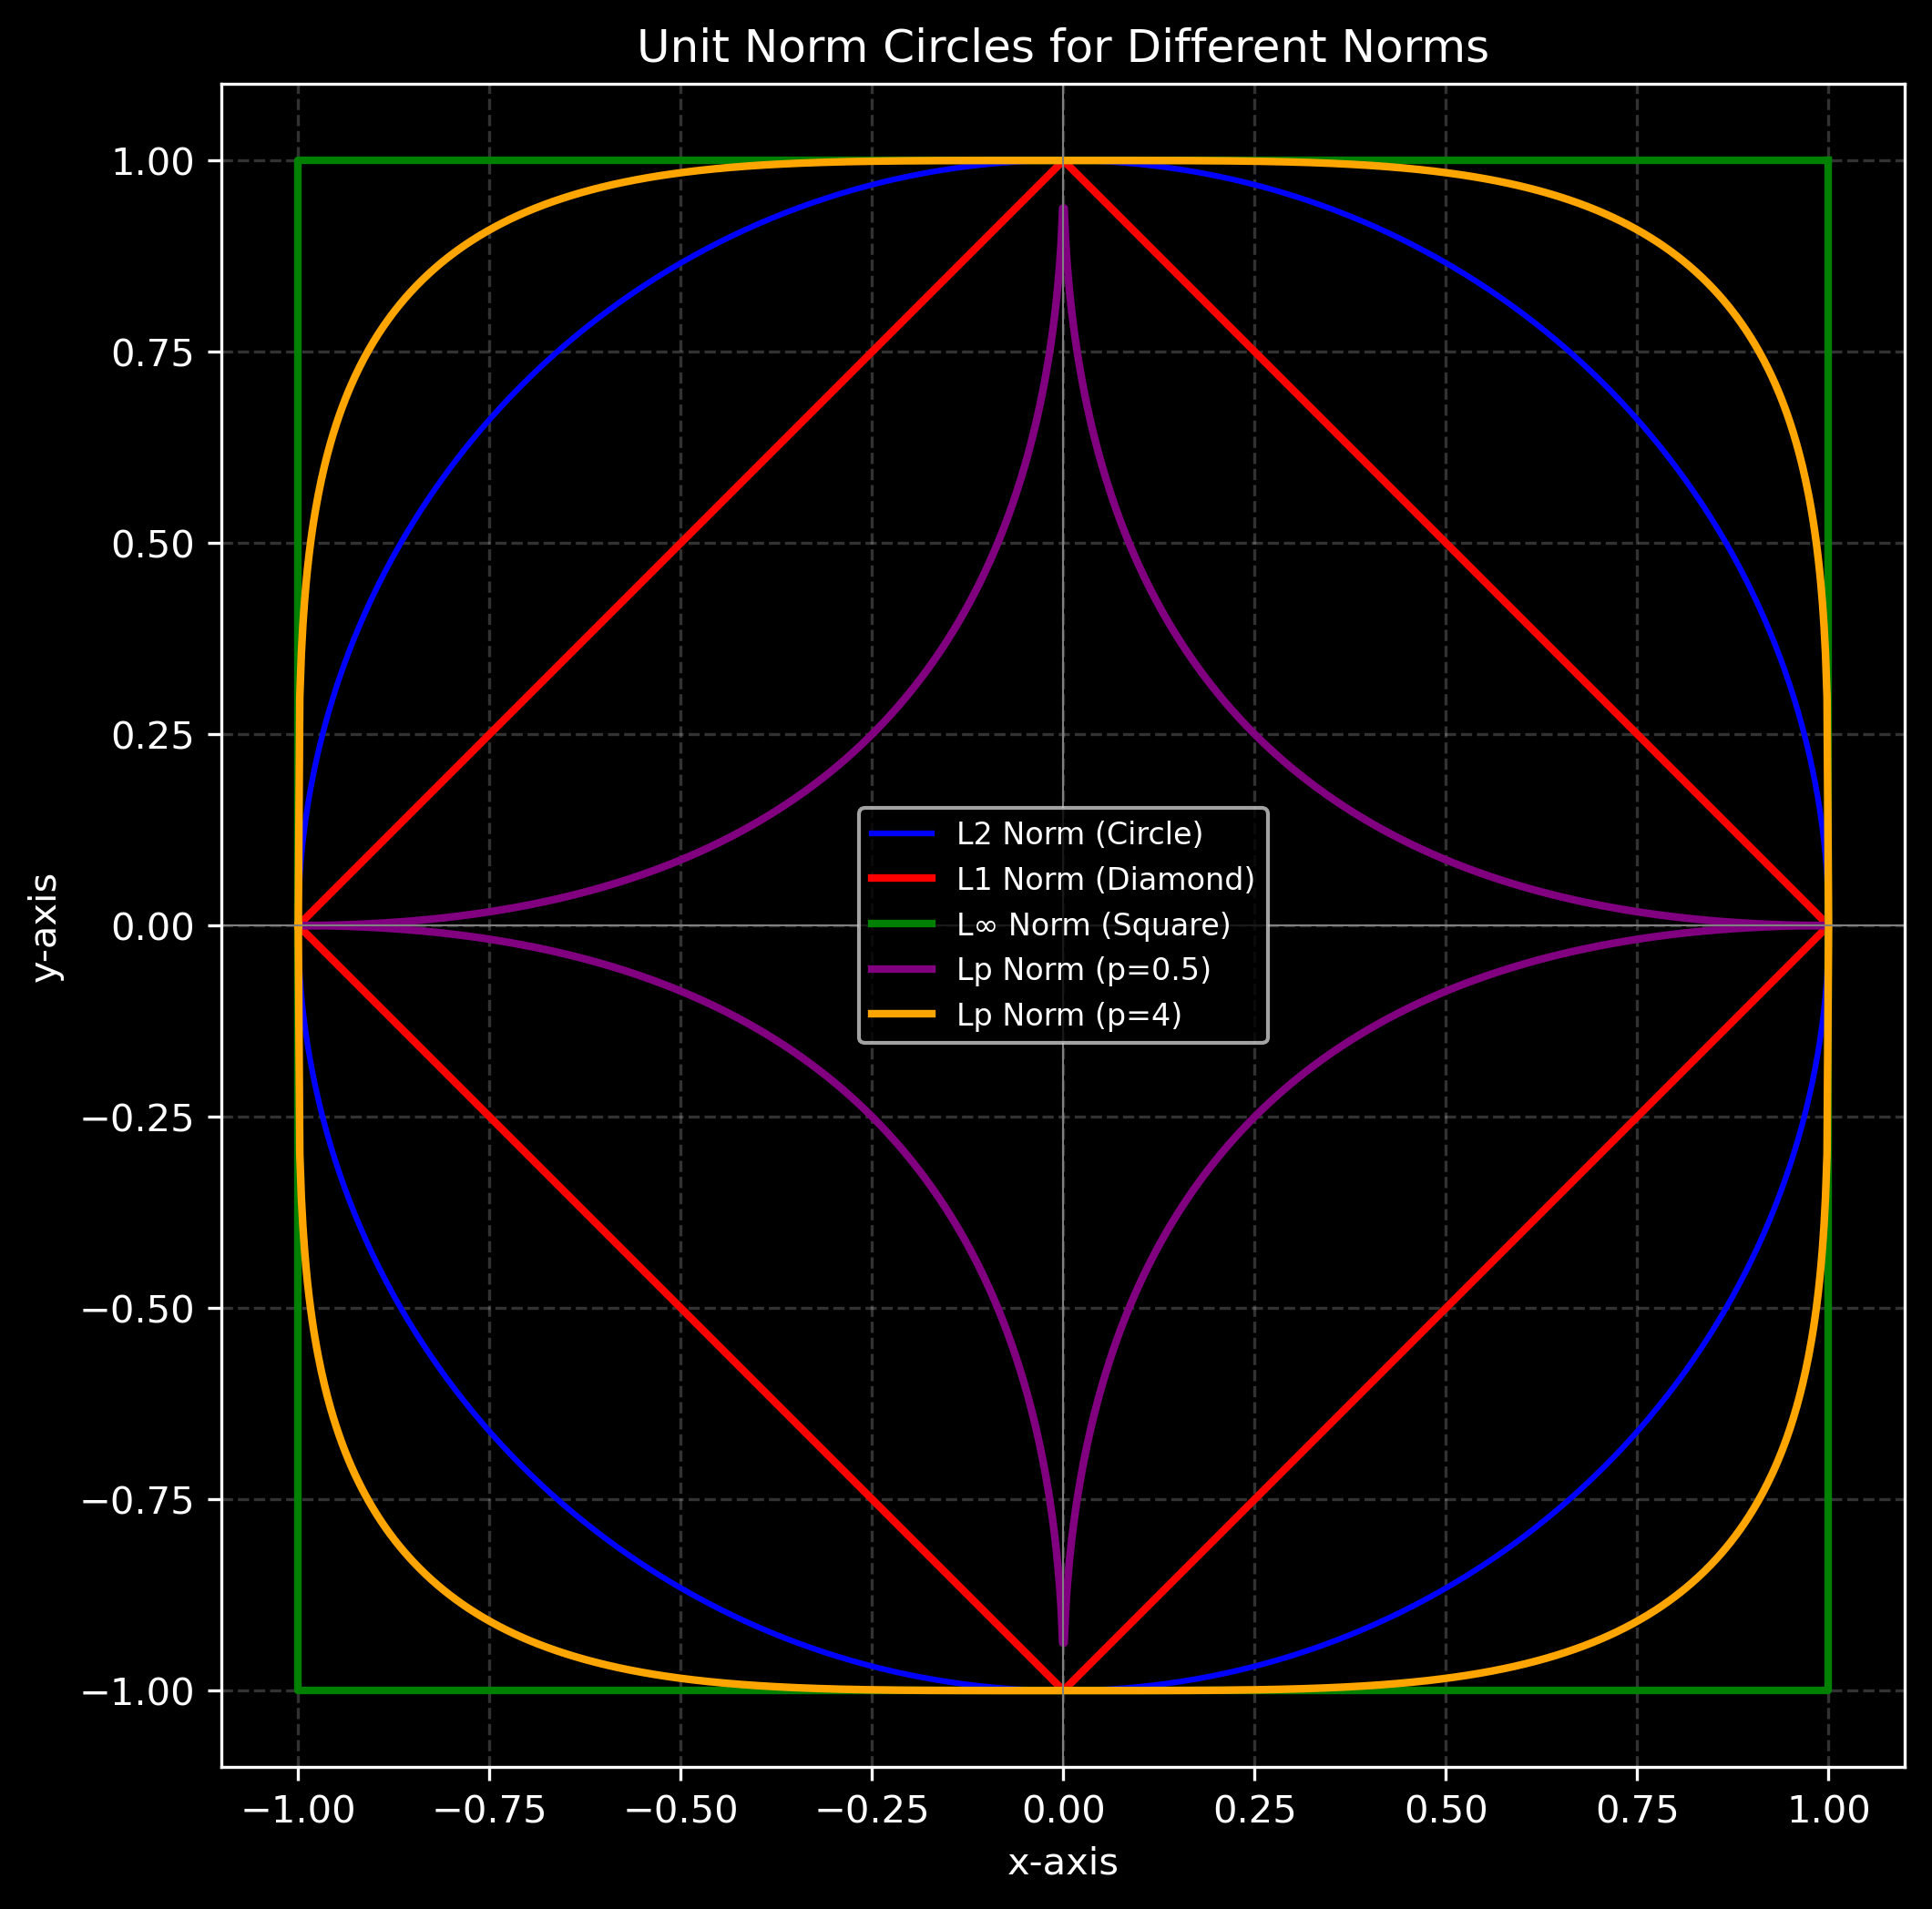

In [4]:
plot_unit_norms()

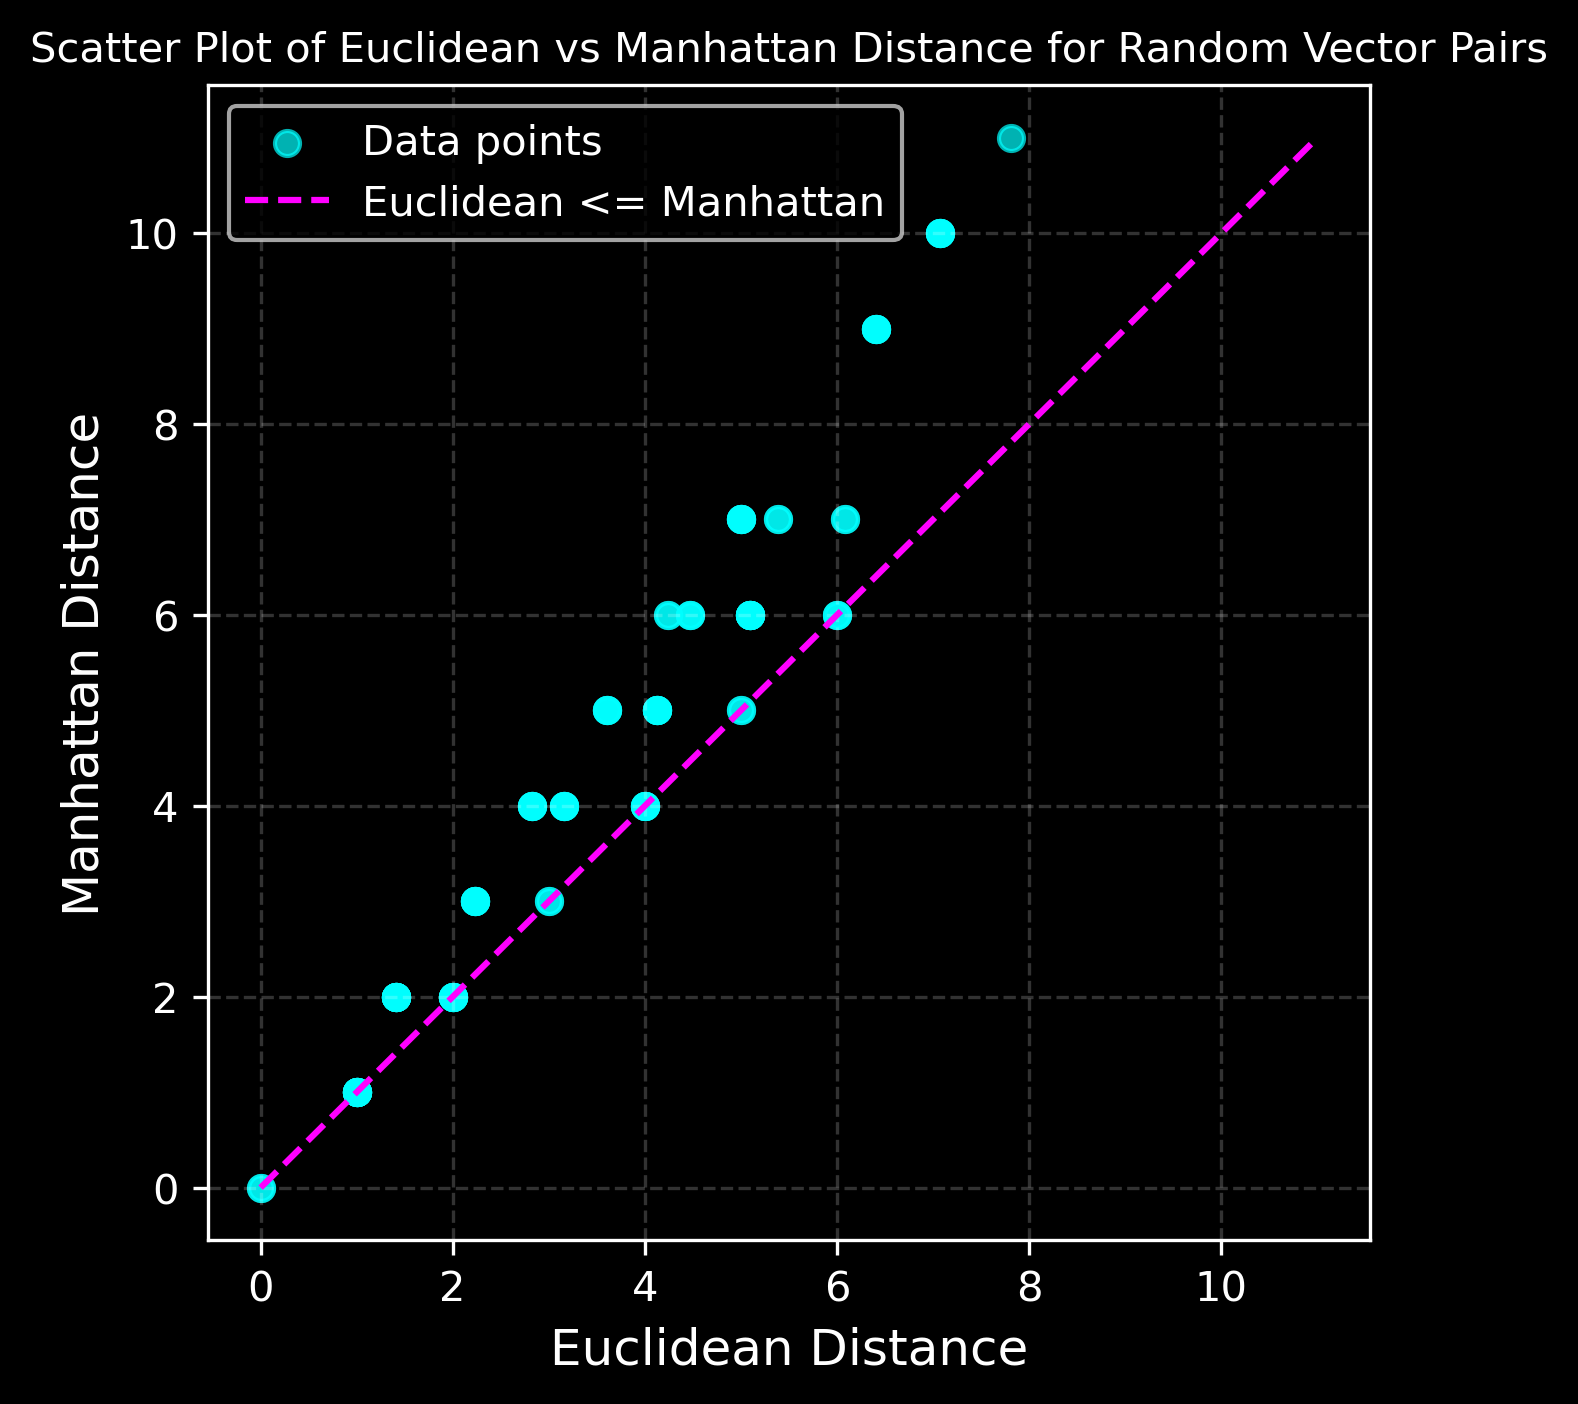

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random pairs of vectors (x1, y1) and (x2, y2) in the range [-3, 3]
x1_values = np.random.randint(-3, 4, size=100)
y1_values = np.random.randint(-3, 4, size=100)
x2_values = np.random.randint(-3, 4, size=100)
y2_values = np.random.randint(-3, 4, size=100)

# Compute Euclidean and Manhattan distances between pairs of vectors
euclidean_distances = np.sqrt((x2_values - x1_values) ** 2 + (y2_values - y1_values) ** 2)
manhattan_distances = np.abs(x2_values - x1_values) + np.abs(y2_values - y1_values)

# Create scatter plot between Euclidean and Manhattan distances
plt.figure(figsize=(5, 5), dpi=300)
plt.scatter(euclidean_distances, manhattan_distances, color='cyan', alpha=0.7, label="Data points")
plt.plot([0, max(manhattan_distances)], [0, max(manhattan_distances)], color='magenta', linestyle='--', label="Euclidean <= Manhattan")

# Add title and labels
plt.title('Scatter Plot of Euclidean vs Manhattan Distance for Random Vector Pairs', fontsize=10)
plt.xlabel('Euclidean Distance', fontsize=12)
plt.ylabel('Manhattan Distance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend()

# Show plot
plt.show()

### **Norm Definition**
A **norm** is a function $\| \cdot \|$ that assigns a non-negative value to a vector, representing its magnitude or length. It satisfies:

1. **Non-negativity**: $\| \mathbf{v} \| \geq 0$, and $\| \mathbf{v} \| = 0$ if $\mathbf{v} = \mathbf{0}$
2. **Absolute scalability**: $\| \alpha \mathbf{v} \| = |\alpha| \| \mathbf{v} \|$
3. **Triangle inequality**: $\| \mathbf{u} + \mathbf{v} \| \leq \| \mathbf{u} \| + \| \mathbf{v} \|$

---

### **Metric Definition**
A **metric** $d(x, y)$ measures the distance between points in a set $X$. It satisfies:

1. **Non-negativity**: $d(x, y) \geq 0$
2. **Identity of indiscernibles**: $d(x, y) = 0$ if and only if $x = y$
3. **Symmetry**: $d(x, y) = d(y, x)$
4. **Triangle inequality**: $d(x, z) \leq d(x, y) + d(y, z)$

---

### **Minkowski Inequality**
The **Minkowski inequality** generalizes the triangle inequality for $p$-norms:

$$
\left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{1/p} \leq \left( \sum_{i=1}^{n} |x_i - y_i|^q \right)^{1/q} \quad \text{for} \quad p \geq q
$$

For Euclidean ($p = 2$) and Manhattan ($p = 1$) distances:

$$
d_E \leq d_M
$$

---
